In [1]:
import pandapower as pp

In [2]:
net = pp.converter.from_mpc(
    mpc_file="../data/unicorn_56_import/unicorn_56.mat",
    f_hz=50,
    casename_mpc_file="mpc",
    validate_conversion=False,
)
net

/Users/behrn/Projects/prime/.venv/lib/python3.12/site-packages/pandapower/converter/pypower/from_ppc.py:337: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  branch_lookup.loc[is_trafo, "element"] = idx_trafo


This pandapower network includes the following parameter tables:
   - bus (56 elements)
   - load (50 elements)
   - sgen (2 elements)
   - ext_grid (1 element)
   - line (55 elements)
   - poly_cost (3 elements)

No or insufficient geodata available --> Creating artificial coordinates. This may take some time


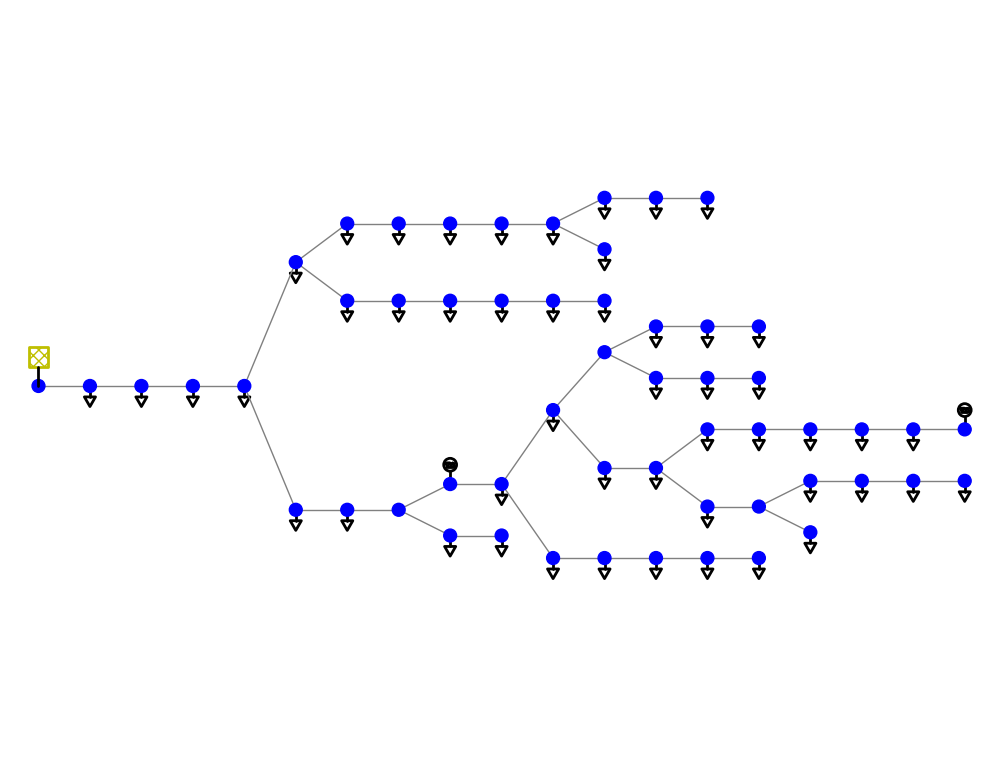

<Axes: >

In [3]:
pp.plotting.simple_plot(net, plot_loads=True, plot_sgens=True)

In [4]:
# clean bus table
if "zone" in net.bus:
    # drop zone
    net.bus = net.bus.drop(["zone"], axis=1)

num_bus = len(net.bus.index)
for i in range(num_bus):
    # name
    if i != 55:
        net.bus.loc[i, "name"] = f"bus_{i}"
    else:
        net.bus.loc[i, "name"] = "bus_substation"

# net.bus

In [5]:
# clean load table
num_load = len(net.load.index)
for i in range(num_load):
    # name
    net.load.loc[i, "name"] = f"load_{net.load.loc[i, 'bus']}"

net.load["p_mw"] *= 2.5  ## change
net.load["q_mvar"] *= 2.5  ## change

net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type,controllable
0,load_0,0,0.4000,0.2000,0.0,0.0,NaN,1.0,True,wye,False
1,load_1,1,0.0500,0.0250,0.0,0.0,NaN,1.0,True,wye,False
2,load_2,2,0.3000,0.1500,0.0,0.0,NaN,1.0,True,wye,False
3,load_3,3,0.2500,0.1250,0.0,0.0,NaN,1.0,True,wye,False
4,load_4,4,0.1000,0.0500,0.0,0.0,NaN,1.0,True,wye,False
5,load_5,5,0.1000,0.0500,0.0,0.0,NaN,1.0,True,wye,False
6,load_7,7,0.0500,0.0250,0.0,0.0,NaN,1.0,True,wye,False
7,load_8,8,0.0500,0.0250,0.0,0.0,NaN,1.0,True,wye,False
8,load_10,10,0.0500,0.0250,0.0,0.0,NaN,1.0,True,wye,False
9,load_11,11,0.1000,0.0500,0.0,0.0,NaN,1.0,True,wye,False


In [6]:
# clean sgen table
num_sgen = len(net.sgen.index)
for i in range(num_sgen):
    # name
    net.sgen.loc[i, "name"] = f"pv_{i}"
    # type
    net.sgen.loc[i, "type"] = "PV"

net.sgen["max_p_mw"] *= 2.5  ## change
net.sgen["max_q_mvar"] *= 2.5  ## change
net.sgen["min_q_mvar"] *= 2.5  ## change

net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,controllable,generator_type,max_p_mw,max_q_mvar,min_p_mw,min_q_mvar
0,pv_0,9,0.0,0.0,1.0,1.0,True,PV,True,1.0,current_source,12.5,2.0,0.0,-2.0
1,pv_1,31,0.0,0.0,1.0,1.0,True,PV,True,1.0,current_source,12.5,0.5,0.0,-0.5


In [7]:
# clean ext_grid table
net.ext_grid.loc[0, "name"] = "substation"

net.ext_grid

,name,bus,vm_pu,va_degree,slack_weight,in_service,min_p_mw,max_p_mw,min_q_mvar,max_q_mvar
0,substation,55,1.0,0.0,1.0,True,-200.0,200.0,-200.0,200.0


In [8]:
# clean line table
net.line = net.line.drop(["std_type"], axis=1)
num_line = len(net.line.index)
for i in range(num_line):
    # name
    net.line.loc[i, "name"] = f"line_{i}"

net.line

,name,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service,geo,max_loading_percent
0,line_0,55,0,1.0,0.023187,0.047505,0.005569,0.0,13.878612,1.0,1,ol,True,None,100.0
1,line_1,0,1,1.0,0.017390,0.035629,0.004177,0.0,13.878612,1.0,1,ol,True,None,100.0
2,line_2,1,2,1.0,0.011594,0.023753,0.002784,0.0,13.878612,1.0,1,ol,True,None,100.0
3,line_3,2,3,1.0,0.017390,0.035629,0.004177,0.0,13.878612,1.0,1,ol,True,None,100.0
4,line_4,3,4,1.0,0.023187,0.047505,0.005569,0.0,13.878612,1.0,1,ol,True,None,100.0
5,line_5,4,5,1.0,0.011594,0.023753,0.002784,0.0,13.878612,1.0,1,ol,True,None,100.0
6,line_6,5,6,1.0,0.007246,0.014845,0.001740,0.0,13.878612,1.0,1,ol,True,None,100.0
7,line_7,6,7,1.0,0.015941,0.032660,0.003829,0.0,13.878612,1.0,1,ol,True,None,100.0
8,line_8,7,8,1.0,0.015941,0.032660,0.003829,0.0,13.878612,1.0,1,ol,True,None,100.0
9,line_9,6,9,1.0,0.020289,0.041567,0.004873,0.0,13.878612,1.0,1,ol,True,None,100.0


In [9]:
del net.poly_cost

In [10]:
pp.to_json(net, "../data/unicorn_56.json")

In [11]:
pp.runpp(net)
print(net._pd2ppc_lookups["bus"])

pv = net._ppc["internal"]["pv"]
pq = net._ppc["internal"]["pq"]
ref = net._ppc["internal"]["ref"]
print(f"ref: {ref}")
print(f"pv: {pv}")
print(f"pq: {pq}")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
ref: [55]
pv: []
pq: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54]


In [12]:
print(net)

This pandapower network includes the following parameter tables:
   - bus (56 elements)
   - load (50 elements)
   - sgen (2 elements)
   - ext_grid (1 element)
   - line (55 elements)
 and the following results tables:
   - res_bus (56 elements)
   - res_line (55 elements)
   - res_ext_grid (1 element)
   - res_load (50 elements)
   - res_sgen (2 elements)
